<a href="https://colab.research.google.com/github/fahmiajik12/Python/blob/Master/data_preprosesJbr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [585]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataset

In [586]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [587]:
#Load Data From Local File
data=pd.read_csv('data.csv')

Data Understanding

In [588]:
#See the first five data 
data.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_banjir,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0,KEJADIAN,2012
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,20,KEJADIAN,2012
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,1,KEJADIAN,2012
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,17,KEJADIAN,2012
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,7,KEJADIAN,2012


In [589]:
# see the number of row and number of columns of data
data.shape

(270, 8)

In [590]:
#Understanding each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   270 non-null    int64 
 1   kode_provinsi        270 non-null    int64 
 2   nama_provinsi        270 non-null    object
 3   kode_kabupaten_kota  270 non-null    int64 
 4   nama_kabupaten_kota  270 non-null    object
 5   jumlah_banjir        270 non-null    int64 
 6   satuan               270 non-null    object
 7   tahun                270 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 17.0+ KB


In [591]:
#see a statistical summary of variables with numeric types
data.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_banjir,tahun
count,270.000000,270.0,270.000000,270.000000,270.000000
mean,135.500000,32.0,3231.333333,7.237037,2016.500000
std,78.086491,0.0,31.259794,10.113635,2.877615
min,1.000000,32.0,3201.000000,0.000000,2012.000000
25%,68.250000,32.0,3207.000000,1.000000,2014.000000
50%,135.500000,32.0,3214.000000,4.000000,2016.500000
75%,202.750000,32.0,3273.000000,9.750000,2019.000000
max,270.000000,32.0,3279.000000,75.000000,2021.000000


Data Cleaning and Preprocessing

Check Dulpicate Data

In [592]:
#Drop duplicate value
data=data.drop_duplicates()

In [593]:
#see changes in the number of rows and columns after the duplicate drop
data.shape

(270, 8)

Check Data Types

In [594]:
#Check data type
data.dtypes

id                      int64
kode_provinsi           int64
nama_provinsi          object
kode_kabupaten_kota     int64
nama_kabupaten_kota    object
jumlah_banjir           int64
satuan                 object
tahun                   int64
dtype: object

In [595]:
#Check the missing value
data.isnull().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jumlah_banjir          0
satuan                 0
tahun                  0
dtype: int64

In [596]:
from sklearn.preprocessing import LabelEncoder

Id_col = ['id']
num_cols = ['jumlah_banjir','satuan']

bin_cols = ['nama_kabupaten_kota','nama_provinsi','satuan']

le = LabelEncoder()
for i in bin_cols :
  data[i] = le.fit_transform(data[i])

#data=pd.get_dummies(data=data,columns = multi_cols,drop_first=True)

In [597]:
data

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_banjir,satuan,tahun
0,1,32,0,3201,3,0,0,2012
1,2,32,0,3202,15,20,0,2012
2,3,32,0,3203,5,1,0,2012
3,4,32,0,3204,0,17,0,2012
4,5,32,0,3205,7,7,0,2012
...,...,...,...,...,...,...,...,...
265,266,32,0,3275,20,14,0,2021
266,267,32,0,3276,24,3,0,2021
267,268,32,0,3277,22,6,0,2021
268,269,32,0,3278,26,2,0,2021


In [598]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size=0.20,random_state=111)

train_X = train.drop(labels='tahun',axis=1)
train_Y = train['tahun']
test_X  = test.drop(labels='tahun',axis=1)
test_Y  = test['tahun']

In [599]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote methode
os = SMOTE(sampling_strategy='minority', random_state = 123,k_neighbors=5)
train_smote_X, train_smote_Y = os.fit_resample(train_X, train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X, columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [600]:
train_Y.value_counts()

2015    24
2020    24
2021    23
2019    23
2016    22
2014    21
2018    20
2013    20
2017    20
2012    19
Name: tahun, dtype: int64

In [601]:
train_smote_Y.value_counts()

tahun
2012     24
2015     24
2020     24
2019     23
2021     23
2016     22
2014     21
2013     20
2017     20
2018     20
dtype: int64

**SVM**

In [602]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [603]:
from sklearn.svm import SVC

model_SVM = SVC(random_state=0)
model_SVM.fit(train_smote_X, train_smote_Y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [604]:
y_pred_svm = model_SVM.predict(test_X)

In [605]:
print(classification_report(test_Y, y_pred_svm))

score = accuracy_score(test_Y, y_pred_svm)
print("Accuracy: %.2f%%" % (score*100))

              precision    recall  f1-score   support

        2012       0.50      1.00      0.67         8
        2013       0.00      0.00      0.00         7
        2014       0.00      0.00      0.00         6
        2015       0.15      1.00      0.26         3
        2016       0.00      0.00      0.00         5
        2017       0.00      0.00      0.00         7
        2018       0.00      0.00      0.00         7
        2019       0.00      0.00      0.00         4
        2020       0.17      1.00      0.29         3
        2021       0.00      0.00      0.00         4

    accuracy                           0.26        54
   macro avg       0.08      0.30      0.12        54
weighted avg       0.09      0.26      0.13        54

Accuracy: 25.93%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest**

In [606]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(train_smote_X, train_smote_Y)

<ipython-input-606-3cc9b4b78856>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_smote_X, train_smote_Y)


RandomForestClassifier(random_state=0)

In [607]:
y_pred = model.predict(test_X)

In [608]:
print(classification_report(test_Y, y_pred))

score = accuracy_score(test_Y, y_pred)
print("Accuracy: %.2f%%" % (score*100))

              precision    recall  f1-score   support

        2012       1.00      0.88      0.93         8
        2013       1.00      0.71      0.83         7
        2014       0.50      0.50      0.50         6
        2015       0.43      1.00      0.60         3
        2016       0.67      0.40      0.50         5
        2017       0.50      0.86      0.63         7
        2018       0.67      0.29      0.40         7
        2019       0.67      0.50      0.57         4
        2020       0.75      1.00      0.86         3
        2021       1.00      1.00      1.00         4

    accuracy                           0.69        54
   macro avg       0.72      0.71      0.68        54
weighted avg       0.74      0.69      0.68        54

Accuracy: 68.52%


In [609]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=10)
clf = RandomForestClassifier()
score_rf_val = cross_val_score(clf,train_smote_X, train_smote_Y,cv=cv)
score_rf_val

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

array([0.73913043, 0.68181818, 0.59090909, 0.63636364, 0.72727273,
       0.86363636, 0.68181818, 0.81818182, 0.90909091, 0.86363636])

In [610]:
score_rf_val.mean()
print("Accuracy Validation Score: %.2f%%" % (score_rf_val.mean()*100))

Accuracy Validation Score: 75.12%


In [611]:
confusion_matrix(test_Y, y_pred)

array([[7, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 6, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 2, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 2, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4]])

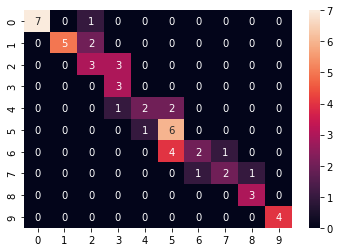

In [612]:
import seaborn as sn
cm = confusion_matrix(test_Y, y_pred)
sn.heatmap(cm, annot=True)